In [66]:
#Importamos las librerias
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as datetime
from shapely.geometry import Point
from matplotlib.colors import ListedColormap

%matplotlib inline
plt.style.use('default')
sns.set(style="whitegrid")

In [67]:
#Cargamos el csv
propiedades=pd.read_csv(r"C:\Users\franc\Downloads\orga datos\train.csv")

Text(0, 0.5, 'propiedad')

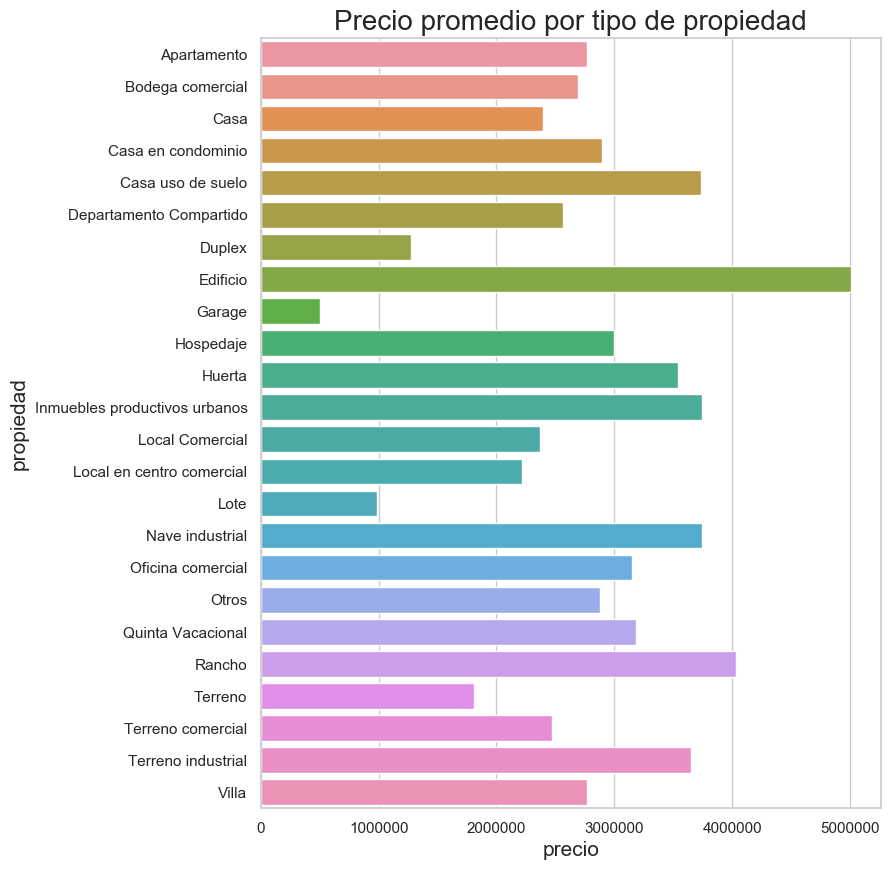

In [76]:
precio_tipo=propiedades.groupby(['tipodepropiedad']).agg({'precio':'mean'})
precio_tipo=precio_tipo.reset_index()
plt.subplots(figsize=(8,10))
grafico_precio_promedio_por_tipo=sns.barplot(y=precio_tipo['tipodepropiedad'],x=precio_tipo['precio'], orient='h')
grafico_precio_promedio_por_tipo.set_title("Precio promedio por tipo de propiedad",fontsize=20)
grafico_precio_promedio_por_tipo.set_xlabel("precio",fontsize=15)
grafico_precio_promedio_por_tipo.set_ylabel("propiedad",fontsize=15)

In [3]:
#Hacemos la conversión de fechas
propiedades['Fecha']=pd.to_datetime(propiedades['fecha'])
propiedades.drop(columns={'fecha'},inplace=True)

In [4]:
#Generamos las columnas de Año, Mes y Dia
propiedades['Anio']=propiedades['Fecha'].dt.year
propiedades['Mes']=propiedades['Fecha'].dt.month
propiedades['Dia']=propiedades['Fecha'].dt.day

In [5]:
def fechaEstacion(mes,dia):
    if((mes==1) | (mes==2)):
        return 'Invierno'
    if(mes==3):
        if(dia<21):
            return 'Invierno'
        if(dia>=21):
            return 'Primavera'
    if((mes==4) | (mes==5)):
        return 'Primavera'
    if(mes==6):
        if(dia<21):
            return 'Primavera'
        if(dia>=21):
            return 'Verano'
    if((mes==7) | (mes==8)):
        return 'Verano'
    if(mes==9):
        if(dia<21):
            return 'Verano'
        if(dia>=21):
            return 'Otonio'
    if((mes==10) | (mes==11)):
        return 'Otonio'
    if(mes==12):
        if(dia<21):
            return 'Otonio'
        if(dia>=21):
            return 'Invierno'

In [6]:
propiedades['Estacion']=propiedades.apply(lambda x: fechaEstacion(x['Mes'],x['Dia']),axis=1)

In [7]:
#cantidad de propiedades por provincia
url="MexicoPoly0295/MexicoPoly02.shp"
mex=gpd.read_file(url)

In [9]:
mex['locname'].replace({'Baja California':'Baja California Norte','Coahuila de Zaragoza':'Coahuila','Estado de México':'Edo. de México','Ciudad de México':'Distrito Federal','Michoacán de Ocampo':'Michoacán','Veracruz de Ignacio de la Llave':'Veracruz','San Luis Potosí':'San luis Potosí'},inplace=True)

In [79]:
mex.rename(columns={'locname':'provincia'},inplace=True)


In [24]:
precio_provincia=propiedades.groupby(['provincia','Estacion']).agg({'precio':'mean'})
precio_provincia=precio_provincia.reset_index()
precio_provincia_mex=pd.merge(mex,precio_provincia,on='provincia',how='inner')
#precio_provincia_mex=precio_provincia_mex.sort_values(by=['precio'], ascending=False).head(40)
#precio_provincia_mex

Text(0.5, 1, 'precio promedio por estado por estacion')

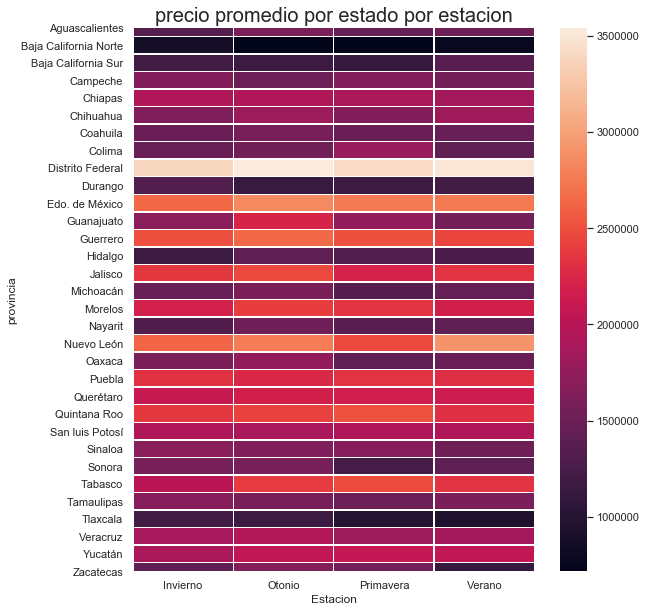

In [39]:
precio_promedio_por_provincia_por_estacion = precio_provincia_mex.pivot("provincia", "Estacion", "precio")
plt.figure(figsize = (9,10))
ax = sns.heatmap(precio_promedio_por_provincia_por_estacion, linewidths=.5)
ax.set_title('precio promedio por estado por estacion', fontsize =20)

In [116]:
precio_ciudad=propiedades.groupby(['ciudad','provincia']).agg({'precio':'mean'})
precio_ciudad=precio_ciudad.reset_index()
precio_ciudad=precio_ciudad.sort_values(by='precio', ascending=False)
precio_ciudad["ciudad_provincia"] = precio_ciudad["ciudad"].map(str) + ", " +precio_ciudad["provincia"]
precio_ciudad=precio_ciudad.head(10)


Text(0, 0.5, 'ciudad')

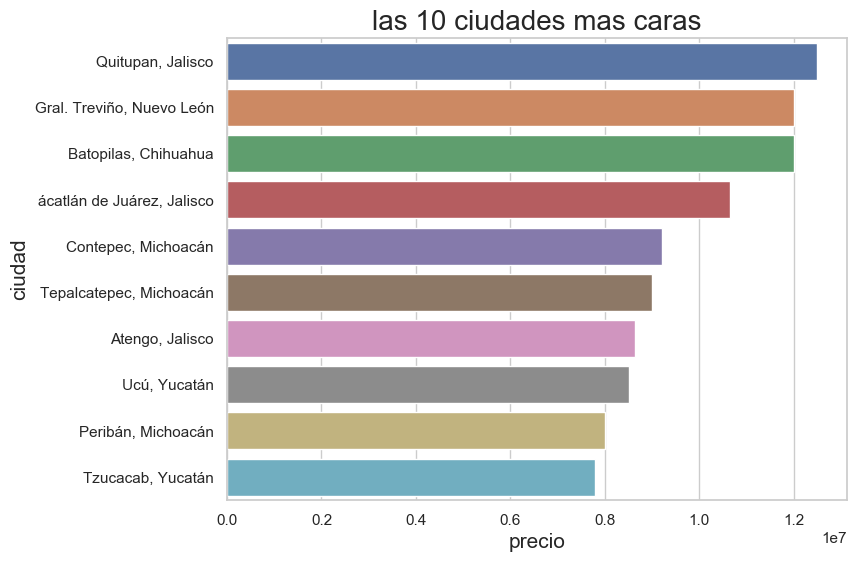

In [124]:
plt.subplots(figsize=(8,6))
graf_precio_ciudad=sns.barplot(y=precio_ciudad['ciudad_provincia'],x=precio_ciudad['precio'],orient='h')
graf_precio_ciudad.set_title("las 10 ciudades mas caras",fontsize=20)
graf_precio_ciudad.set_xlabel("precio",fontsize=15)
graf_precio_ciudad.set_ylabel("ciudad",fontsize=15)

In [127]:
piscina_ciudad=propiedades.groupby(['ciudad','provincia']).agg({'piscina':'sum'})
piscina_ciudad=piscina_ciudad.reset_index()
piscina_ciudad=piscina_ciudad.sort_values(by='piscina', ascending=False)
piscina_ciudad["ciudad_provincia"] =piscina_ciudad["ciudad"].map(str) + ", " +piscina_ciudad["provincia"]
piscina_ciudad=piscina_ciudad.head(10)

Text(0, 0.5, 'ciudad')

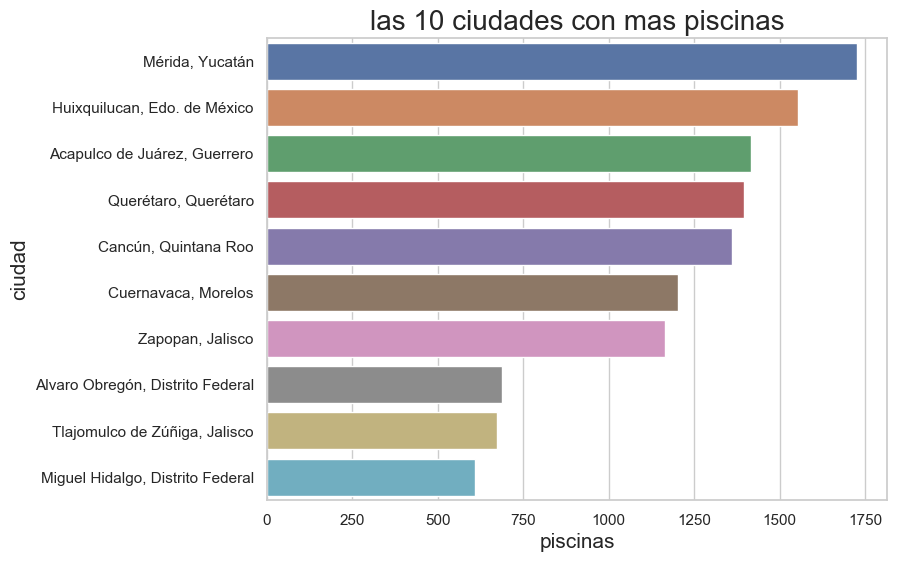

In [129]:
plt.subplots(figsize=(8,6))
graf_precio_ciudad=sns.barplot(y=piscina_ciudad['ciudad_provincia'],x=piscina_ciudad['piscina'],orient='h')
graf_precio_ciudad.set_title("las 10 ciudades con mas piscinas",fontsize=20)
graf_precio_ciudad.set_xlabel("piscinas",fontsize=15)
graf_precio_ciudad.set_ylabel("ciudad",fontsize=15)

In [134]:
cant_prop_ciudad=propiedades.groupby(['ciudad','provincia']).agg({'tipodepropiedad':'count'})
cant_prop_ciudad=cant_prop_ciudad.reset_index()
cant_prop_ciudad=cant_prop_ciudad.sort_values(by='tipodepropiedad', ascending=False)
cant_prop_ciudad["ciudad_provincia"] =cant_prop_ciudad["ciudad"].map(str) + ", " +piscina_ciudad["provincia"]
cant_prop_ciudad=cant_prop_ciudad.head(10)

Text(0, 0.5, 'ciudad')

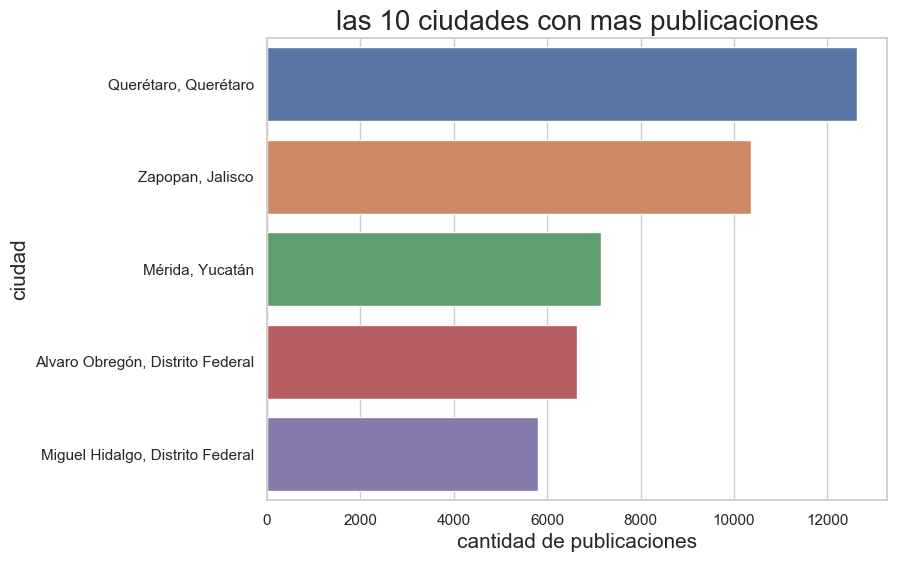

In [135]:
plt.subplots(figsize=(8,6))
graf_precio_ciudad=sns.barplot(y=cant_prop_ciudad['ciudad_provincia'],x=cant_prop_ciudad['tipodepropiedad'],orient='h')
graf_precio_ciudad.set_title("las 10 ciudades con mas publicaciones",fontsize=20)
graf_precio_ciudad.set_xlabel("cantidad de publicaciones",fontsize=15)
graf_precio_ciudad.set_ylabel("ciudad",fontsize=15)

In [149]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [161]:
metros_totales_ciudad=propiedades.groupby(['ciudad','provincia']).agg({'metrostotales':'mean'})
metros_totales_ciudad=metros_totales_ciudad.reset_index()
metros_totales_ciudad=metros_totales_ciudad.sort_values(by='metrostotales', ascending=False)
metros_totales_ciudad["ciudad_provincia"] =metros_totales_ciudad["ciudad"].map(str) + ", " +metros_totales_ciudad["provincia"]
metros_totales_ciudad=metros_totales_ciudad.head(10)

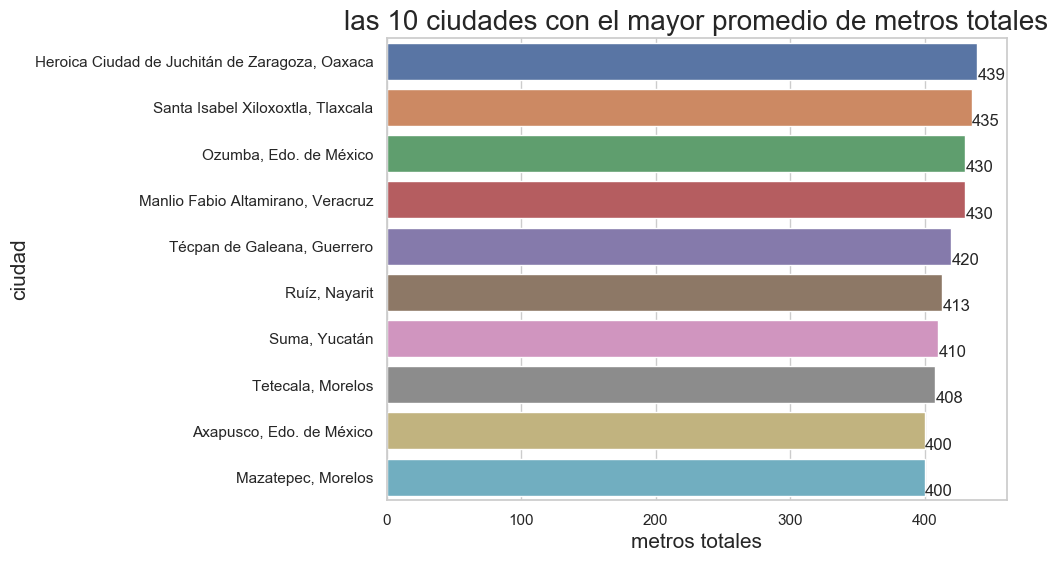

In [163]:
plt.subplots(figsize=(8,6))
graf_precio_ciudad=sns.barplot(y=metros_totales_ciudad['ciudad_provincia'],x=metros_totales_ciudad['metrostotales'],orient='h')
graf_precio_ciudad.set_title("las 10 ciudades con el mayor promedio de metros totales",fontsize=20)
graf_precio_ciudad.set_xlabel("metros totales",fontsize=15)
graf_precio_ciudad.set_ylabel("ciudad",fontsize=15)
show_values_on_bars(graf_precio_ciudad, "h", 0.3)

In [ ]:
metros_cubiertos_ciudad=propiedades.groupby(['ciudad','provincia']).agg({'metroscubiertos':'mean'})
metros_cubiertos_ciudad=metros_cubiertos_ciudad.reset_index()
metros_cubiertos_ciudad=metros_cubiertos_ciudad.sort_values(by='metroscubiertos', ascending=False)
metros_cubiertos_ciudad["ciudad_provincia"] =metros_cubiertos_ciudad["ciudad"].map(str) + ", " +metros_cubiertos_ciudad["provincia"]
metros_cubiertos_ciudad=metros_cubiertos_ciudad.head(10)

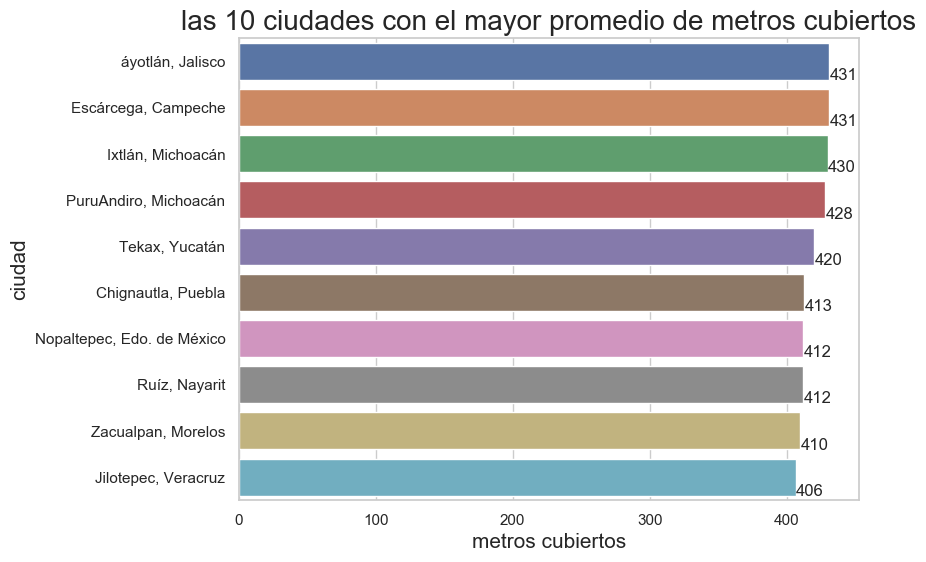

In [150]:
plt.subplots(figsize=(8,6))
graf_precio_ciudad=sns.barplot(y=metros_cubiertos_ciudad['ciudad_provincia'],x=metros_cubiertos_ciudad['metroscubiertos'],orient='h')
graf_precio_ciudad.set_title("las 10 ciudades con el mayor promedio de metros cubiertos",fontsize=20)
graf_precio_ciudad.set_xlabel("metros cubiertos",fontsize=15)
graf_precio_ciudad.set_ylabel("ciudad",fontsize=15)
show_values_on_bars(graf_precio_ciudad, "h", 0.3)

In [152]:
def metrosCubiertos(metros):
    if (metros>0):
        return metros
    else:
        return 0

In [154]:
propiedades['difmetros']=propiedades['metrostotales']-propiedades['metroscubiertos']
propiedades["metrosdescubiertos"] = propiedades.apply(lambda x: metrosCubiertos(x['difmetros']),axis=1)
propiedades.drop(columns={'difmetros'},inplace=True)

In [156]:
metros_descubiertos_ciudad=propiedades.groupby(['ciudad','provincia']).agg({'metrosdescubiertos':'mean'})
metros_descubiertos_ciudad=metros_descubiertos_ciudad.reset_index()
metros_descubiertos_ciudad=metros_descubiertos_ciudad.sort_values(by='metrosdescubiertos', ascending=False)
metros_descubiertos_ciudad["ciudad_provincia"] =metros_descubiertos_ciudad["ciudad"].map(str) + ", " +metros_descubiertos_ciudad["provincia"]
metros_descubiertos_ciudad=metros_descubiertos_ciudad.head(10)

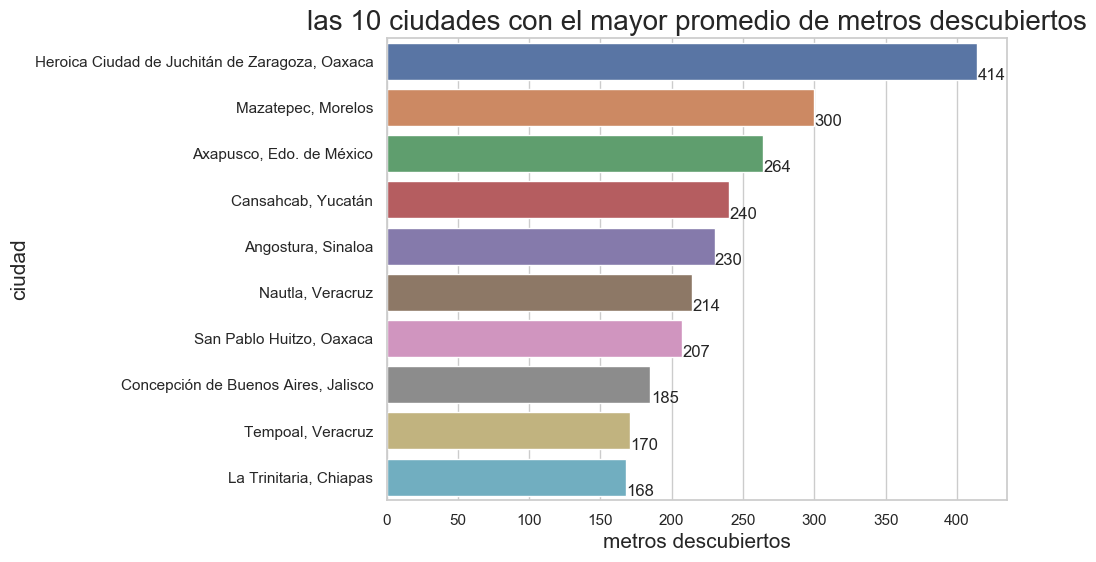

In [158]:
plt.subplots(figsize=(8,6))
graf_precio_ciudad=sns.barplot(y=metros_descubiertos_ciudad['ciudad_provincia'],x=metros_descubiertos_ciudad['metrosdescubiertos'],orient='h')
graf_precio_ciudad.set_title("las 10 ciudades con el mayor promedio de metros descubiertos",fontsize=20)
graf_precio_ciudad.set_xlabel("metros descubiertos",fontsize=15)
graf_precio_ciudad.set_ylabel("ciudad",fontsize=15)
show_values_on_bars(graf_precio_ciudad, "h", 0.3)

In [165]:
antiguedad_ciudad=propiedades.groupby(['ciudad','provincia']).agg({'antiguedad':'mean'})
antiguedad_ciudad=antiguedad_ciudad.reset_index()
antiguedad_ciudad=antiguedad_ciudad.sort_values(by='antiguedad', ascending=False)
antiguedad_ciudad["ciudad_provincia"] =antiguedad_ciudad["ciudad"].map(str) + ", " +antiguedad_ciudad["provincia"]
antiguedad_ciudad=antiguedad_ciudad.head(10)

Text(0, 0.5, 'ciudad')

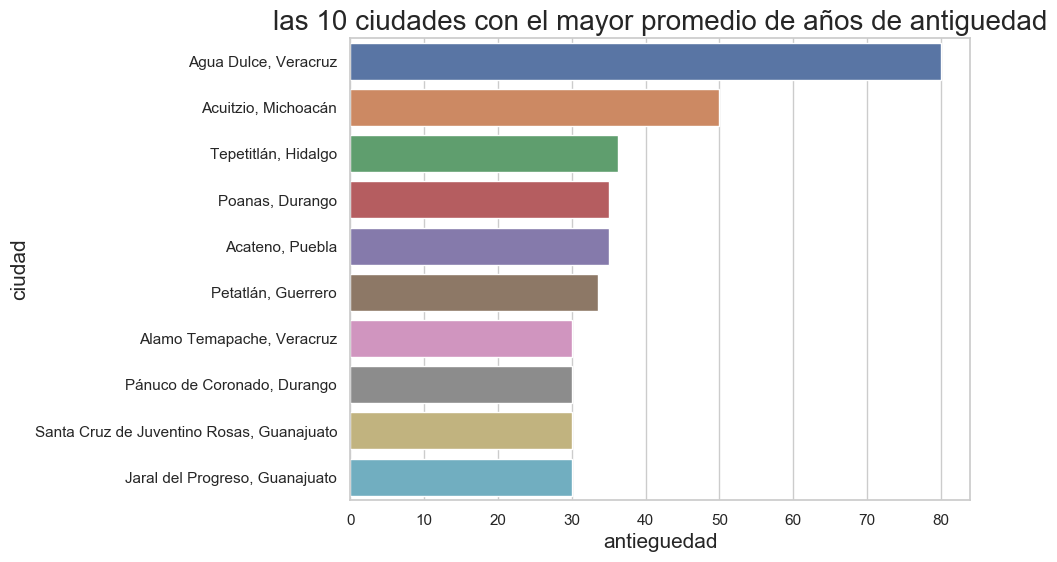

In [168]:
plt.subplots(figsize=(8,6))
graf_precio_ciudad=sns.barplot(y=antiguedad_ciudad['ciudad_provincia'],x=antiguedad_ciudad['antiguedad'],orient='h')
graf_precio_ciudad.set_title("las 10 ciudades con el mayor promedio de años de antiguedad",fontsize=20)
graf_precio_ciudad.set_xlabel("antieguedad",fontsize=15)
graf_precio_ciudad.set_ylabel("ciudad",fontsize=15)

In [170]:
habitaciones_ciudad=propiedades.groupby(['ciudad','provincia']).agg({'habitaciones':'mean'})
habitaciones_ciudad=habitaciones_ciudad.reset_index()
habitaciones_ciudad=habitaciones_ciudad.sort_values(by='habitaciones', ascending=False)
habitaciones_ciudad["ciudad_provincia"] =habitaciones_ciudad["ciudad"].map(str) + ", " +habitaciones_ciudad["provincia"]
habitaciones_ciudad=habitaciones_ciudad.head(10)

Text(0, 0.5, 'ciudad')

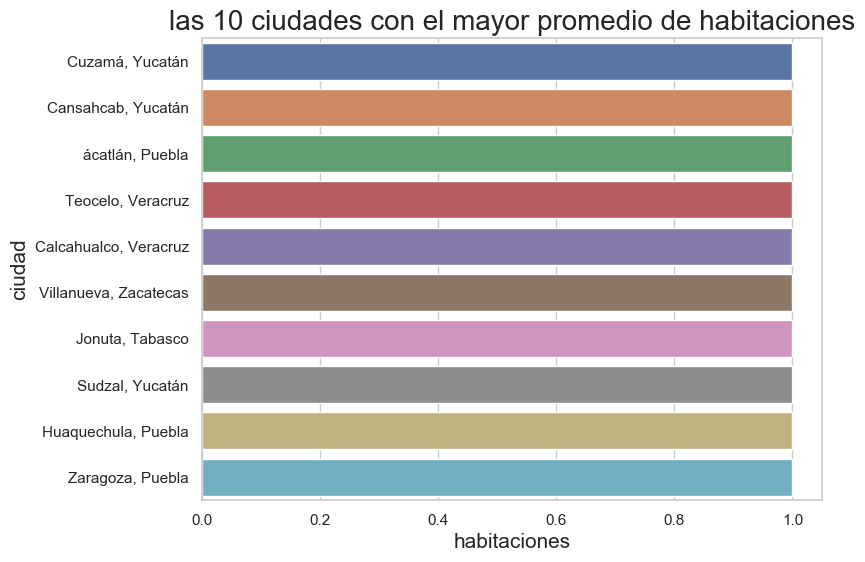

In [173]:
plt.subplots(figsize=(8,6))
graf_precio_ciudad=sns.barplot(y=habitaciones_ciudad['ciudad_provincia'],x=habitaciones_ciudad['habitaciones'],orient='h')
graf_precio_ciudad.set_title("las 10 ciudades con el mayor promedio de habitaciones",fontsize=20)
graf_precio_ciudad.set_xlabel("habitaciones",fontsize=15)
graf_precio_ciudad.set_ylabel("ciudad",fontsize=15)

In [172]:
habitaciones_ciudad=propiedades.groupby(['ciudad','provincia']).agg({'habitaciones':'mean'})
habitaciones_ciudad=habitaciones_ciudad.reset_index()
habitaciones_ciudad=habitaciones_ciudad.sort_values(by='habitaciones')
habitaciones_ciudad["ciudad_provincia"] =habitaciones_ciudad["ciudad"].map(str) + ", " +habitaciones_ciudad["provincia"]
habitaciones_ciudad=habitaciones_ciudad.head(10)

Text(0, 0.5, 'ciudad')

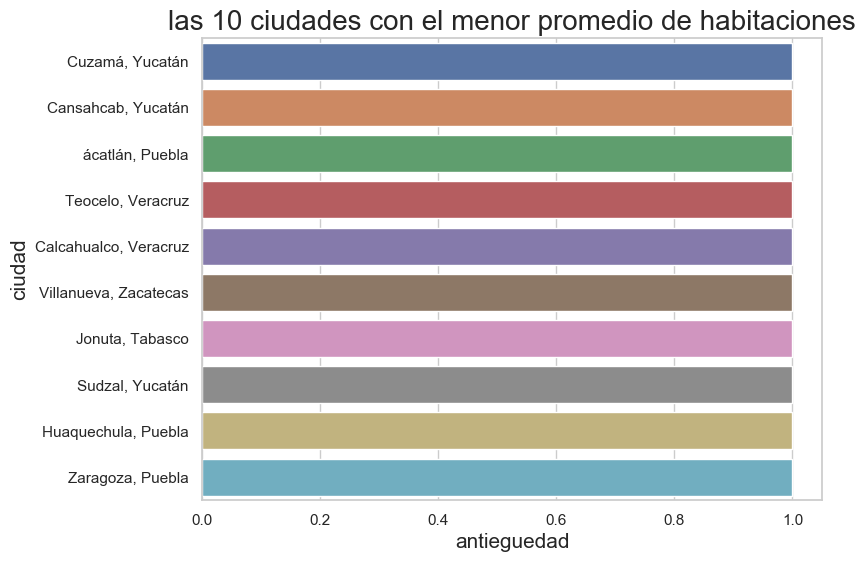

In [174]:
plt.subplots(figsize=(8,6))
graf_precio_ciudad=sns.barplot(y=habitaciones_ciudad['ciudad_provincia'],x=habitaciones_ciudad['habitaciones'],orient='h')
graf_precio_ciudad.set_title("las 10 ciudades con el menor promedio de habitaciones",fontsize=20)
graf_precio_ciudad.set_xlabel("antieguedad",fontsize=15)
graf_precio_ciudad.set_ylabel("ciudad",fontsize=15)

In [180]:
escuelas_ciudad=propiedades.groupby(['ciudad','provincia']).agg({'escuelascercanas':'mean'})
escuelas_ciudad=escuelas_ciudad.reset_index()
escuelas_ciudad=escuelas_ciudad.sort_values(by='escuelascercanas',ascending=False)
escuelas_ciudad["ciudad_provincia"] =escuelas_ciudad["ciudad"].map(str) + ", " +escuelas_ciudad["provincia"]
escuelas_ciudad=escuelas_ciudad.head(10)